In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df=df.rename(columns={"Genre":"Gender"})

In [5]:
df.shape

(200, 5)

In [6]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
X = df.iloc[:, [3, 4]].values

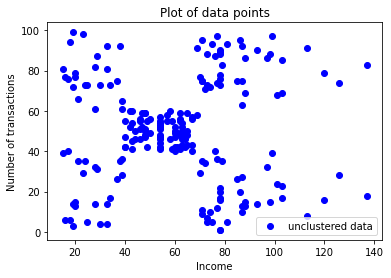

In [9]:
plt.scatter(X[:,0],X[:,1],c='blue',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

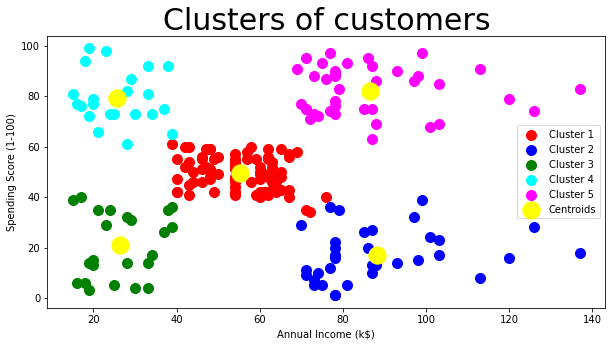

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters

plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers', fontsize=30)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):#it will range for 1-30 centeroids
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)#kmeans ++ means that it effectively takes the centroid than random
    kmeans.fit(X)#fitting the data in the kmeans
    wcss.append(kmeans.inertia_)#appending the data in wcss list


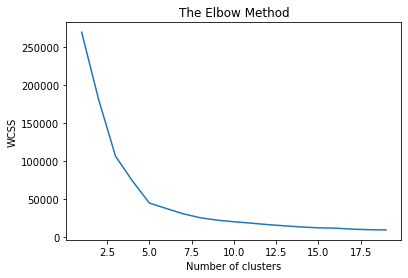

In [12]:
plt.plot(range(1, 20), wcss)#plotting the wcss vs number of cluster graph
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
df.loc[df['Gender']=="Male",'Gender']=1
df.loc[df['Gender']=="Female",'Gender']=0

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [18]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

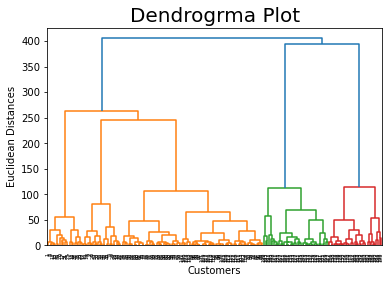

In [30]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
plt.title("Dendrogrma Plot",size=20)  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show() 

In [39]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(X)  

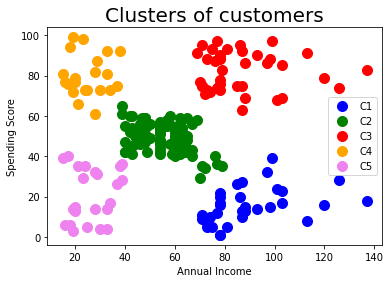

In [40]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'C1')  
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'green', label = 'C2')  
plt.scatter(X[y_pred== 2, 0], X[y_pred == 2, 1], s = 100, c = 'red', label = 'C3')  
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'orange', label = 'C4')  
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'violet', label = 'C5')  
plt.title('Clusters of customers',size=20)  
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')  
plt.legend()  
plt.show()  